In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick

In [3]:
data_population = pd.read_csv('data/POP_BY_COUNTRY/API_SP.POP.TOTL_DS2_en_csv_v2_10515200.csv', dtype='unicode', skiprows=4)
data_population.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211,55438,56225,56695,57032,57360,...,101669,102053,102577,103187,103795,104341,104822,105264,NaN,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351,9166764,9345868,9533954,9731361,9938414,...,28803167,29708599,30696958,31731688,32758020,33736494,34656032,35530081,NaN,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182,5753024,5866061,5980417,6093321,6203299,...,23369131,24218565,25096150,25998340,26920466,27859305,28813463,29784193,NaN,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800,1659800,1711319,1762621,1814135,1864791,...,2913021,2905195,2900401,2895092,2889104,2880703,2876101,2873457,NaN,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411,14375,15370,16412,17469,18549,...,84449,83751,82431,80788,79223,78014,77281,76965,NaN,NaN


In [4]:
data_population[data_population['Country Name'] == 'Brazil']

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
27,Brazil,BRA,"Population, total",SP.POP.TOTL,72207554,74351763,76573248,78854019,81168654,83498020,...,196796269,198686688,200560983,202408632,204213133,205962108,207652865,209288278,NaN,NaN


In [5]:
data_poverty = pd.read_csv('data/OUR_WORLD_IN_DATA/world-population-in-extreme-poverty-absolute.csv', dtype='unicode')
data_poverty[['Year', 'Number of people not in extreme poverty (people)', 'Number of people living in extreme poverty (people)']] = data_poverty[['Year', 'Number of people not in extreme poverty (people)', 'Number of people living in extreme poverty (people)']].apply(pd.to_numeric)
data_poverty = data_poverty.sort_values(by=['Year'])
data_poverty = data_poverty[data_poverty['Year'] > 1980]
data_poverty['Number of people'] = data_poverty['Number of people not in extreme poverty (people)'] + data_poverty['Number of people living in extreme poverty (people)']
data_poverty

,Entity,Code,Year,Number of people not in extreme poverty (people),Number of people living in extreme poverty (people),Number of people
10,World,OWID_WRL,1981,2.609493e+09,1.909109e+09,4.518602e+09
11,World,OWID_WRL,1984,2.895614e+09,1.870044e+09,4.765658e+09
12,World,OWID_WRL,1987,3.249321e+09,1.784484e+09,5.033805e+09
13,World,OWID_WRL,1990,3.406152e+09,1.903516e+09,5.309668e+09
14,World,OWID_WRL,1993,3.683471e+09,1.886574e+09,5.570045e+09
15,World,OWID_WRL,1996,4.105667e+09,1.709725e+09,5.815392e+09
16,World,OWID_WRL,1999,4.317318e+09,1.731887e+09,6.049205e+09
17,World,OWID_WRL,2002,4.670891e+09,1.611410e+09,6.282302e+09
18,World,OWID_WRL,2005,5.166811e+09,1.352824e+09,6.519636e+09
19,World,OWID_WRL,2008,5.540174e+09,1.223559e+09,6.763733e+09


# Scatter plot

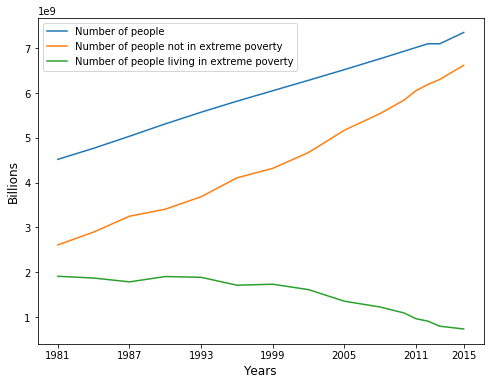

In [6]:
plt.figure(figsize=(8, 6))
plt.plot(data_poverty['Year'], data_poverty['Number of people'])
plt.plot(data_poverty['Year'], data_poverty['Number of people not in extreme poverty (people)'])
plt.plot(data_poverty['Year'], data_poverty['Number of people living in extreme poverty (people)'])
plt.xticks(np.concatenate((np.arange(1981, 2012, step=6), np.array([2015])), axis=0))
plt.xlabel('Years', fontsize=12)
plt.ylabel('Billions', fontsize=12)
plt.legend(['Number of people', 'Number of people not in extreme poverty', 'Number of people living in extreme poverty'], loc='upper left')
plt.show()

# Area chart

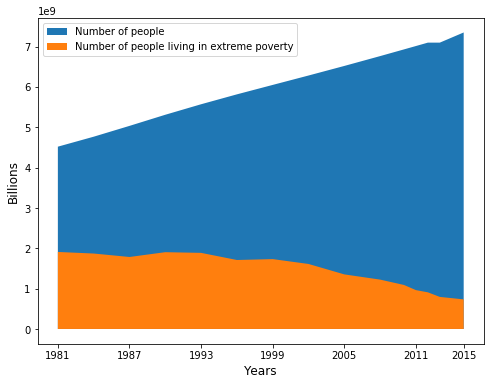

In [7]:
plt.figure(figsize=(8, 6))
plt.fill_between(data_poverty['Year'], data_poverty['Number of people'])
plt.fill_between(data_poverty['Year'], data_poverty['Number of people living in extreme poverty (people)'])
plt.xticks(np.concatenate((np.arange(1981, 2012, step=6), np.array([2015])), axis=0))
plt.xlabel('Years', fontsize=12)
plt.ylabel('Billions', fontsize=12)
plt.legend(['Number of people', 'Number of people living in extreme poverty'], loc='upper left')
plt.show()

In [8]:
# relative data to build 100% stacked 
data_relative = data_poverty[['Number of people not in extreme poverty (people)', 'Number of people living in extreme poverty (people)']]
data_relative = data_relative.divide(data_relative.sum(axis=1), axis=0)

# Stacked area chart

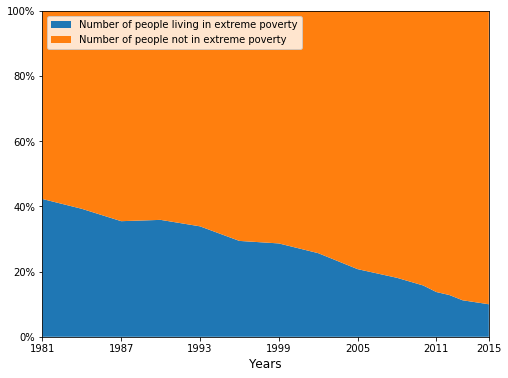

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))

# ax.stackplot(data_poverty['Year'],  data_relative['Number of people not in extreme poverty (people)'],  data_relative['Number of people living in extreme poverty (people)'], labels=['Number of people not in extreme poverty', 'Number of people living in extreme poverty'])
ax.stackplot(data_poverty['Year'], data_relative['Number of people living in extreme poverty (people)'],  data_relative['Number of people not in extreme poverty (people)'], labels=['Number of people living in extreme poverty', 'Number of people not in extreme poverty'])
ax.margins(0,0)
ax.set_xticks(np.concatenate((np.arange(1981, 2012, step=6), np.array([2015])), axis=0))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.xlabel('Years', fontsize=12)
plt.legend(loc='upper left')
plt.show()

# Iterative visualizations

In [10]:
import plotly.plotly as py
import plotly.graph_objs as go
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# init_notebook_mode(connected=True)

# plt.fill_between(data_poverty['Year'], data_poverty['Number of people'])
# plt.fill_between(data_poverty['Year'], data_poverty['Number of people living in extreme poverty (people)'])

trace1 = go.Scatter(
    x=data_poverty['Year'],
    y=data_poverty['Number of people living in extreme poverty (people)'],
    stackgroup='one',
    mode='none',
    name='Number of people living in extreme poverty',
)

trace2 = go.Scatter(
    x=data_poverty['Year'],
    y=data_poverty['Number of people not in extreme poverty (people)'],
    stackgroup='one',
    mode='none',
    name='Number of people not in extreme poverty '
)

data = [trace1, trace2]

layout = go.Layout(
    xaxis = go.layout.XAxis(
        tickmode='array',
        tickvals=np.concatenate((np.arange(1981, 2012, step=6), np.array([2015])), axis=0),
        title='Years'
    ),
)

fig = go.Figure(
    data = data,
    layout = layout
)

py.iplot(fig, filename='stacked-area-char')

In [11]:
trace1 = go.Scatter(
    x=data_poverty['Year'],
    y=data_relative['Number of people living in extreme poverty (people)'],
    stackgroup='one',
    mode='none',
    name='Number of people living in extreme poverty',
)

trace2 = go.Scatter(
    x=data_poverty['Year'],
    y=data_relative['Number of people not in extreme poverty (people)'],
    stackgroup='one',
    mode='none',
    name='Number of people not in extreme poverty'
)

data = [trace1, trace2]

layout = go.Layout(
    xaxis = go.layout.XAxis(
        tickmode='array',
        tickvals=np.concatenate((np.arange(1981, 2012, step=6), np.array([2015])), axis=0),
        title='Years'
    ),
    yaxis=go.layout.YAxis(
        tickformat=',.0%'
    )
)

fig = go.Figure(
    data = data,
    layout = layout
)

py.iplot(fig, filename='stacked-relative-area-char')

In [65]:
trace = go.Scatter(
    x=data_poverty['Year'],
    y=data_poverty['Number of people'],
    name='Number of people'
)

trace1 = go.Scatter(
    x = data_poverty['Year'],
    y = data_poverty['Number of people not in extreme poverty (people)'],
    name='Number of people not in extreme poverty'
)

trace2 = go.Scatter(
    x = data_poverty['Year'],
    y = data_poverty['Number of people living in extreme poverty (people)'],
    name='Number of people living in extreme poverty'
)

data = [trace, trace1, trace2]

layout = go.Layout(
    xaxis = go.layout.XAxis(
        tickmode='array',
        tickvals=np.concatenate((np.arange(1981, 2012, step=6), np.array([2015])), axis=0),
        title='Years'
    ),
)

fig = go.Figure(
    data = data,
    layout = layout
)

py.iplot(fig, filename='basic-line')